In [113]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Carregando e importando dados 

In [220]:
# leitura dos dados 
df = pd.read_csv("df_fiis.csv", index_col="TICKER")

# Visualização de valores floats com 2 casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)


# Removendo colunas indesejadas
df = df.drop(
    columns=[
        "SOMA_YIELD_ANO_CORRENTE",
        "TX_GESTAO"
    ]
)

# Visualização dos tipos dados
df.info()

# Visualizar dados
df

<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, AAGR11 to ZIFI11
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SETOR                526 non-null    object 
 1   COTACAO_FECHAMENTO   527 non-null    object 
 2   VALOR                527 non-null    float64
 3   LIQUIDEZMEDIADIARIA  480 non-null    float64
 4   PVP                  527 non-null    float64
 5   YELD                 527 non-null    object 
 6   MEDIA_YIELD_12M      527 non-null    object 
 7   RENTABILIDADE        527 non-null    object 
 8   NUMERO_COTISTA       527 non-null    int64  
 9   PATRIMONIO_LIQUIDO   527 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 45.3+ KB


,SETOR,COTACAO_FECHAMENTO,VALOR,LIQUIDEZMEDIADIARIA,PVP,YELD,MEDIA_YIELD_12M,RENTABILIDADE,NUMERO_COTISTA,PATRIMONIO_LIQUIDO
TICKER,,,,,,,,,,
AAGR11,Outros,96.1400,99.00,5250.61,0.00,1.2100,1.2625,10.0613,0,0.00
AAZQ11,Outros,7.3400,7.21,685569.94,0.84,1.2900,1.4817,20.5712,29817,206946884.06
ABCP11,Shoppings,78.8400,79.49,43676.94,0.74,0.7600,0.8650,23.1464,14920,507004106.39
AFHI11,Papéis,91.7500,92.75,653506.06,0.99,1.0800,1.0783,11.4550,42402,424592667.11
AGRX11,Outros,8.0900,8.06,206613.83,0.79,1.3600,1.3467,22.9554,19257,183235232.66
...,...,...,...,...,...,...,...,...,...,...
YUFI11B,Outros,0.0000,0.00,NaN,0.00,0.0000,0.0000,0.0000,0,41701052.98
ZAGH11,Serviços Financeiros Diversos,10.1400,10.37,1083.94,1.14,0.6900,0.5650,-16.9743,408,80888876.47
ZAVC11,Outros,---,8.48,54011.11,0.82,0.0000,1.2417,---,195,30880981.49


### Limpeza de dados (Removendo dados inválidos)

In [202]:
# Ajustar valores numéricos
df_filtrado = df.copy()  # cria cópia do df original

df_filtrado = df_filtrado.replace("---", np.nan)
df_filtrado[["LIQUIDEZ_MEDIA_DIARIA", "RENTABILIDADE", "COTACAO_FECHAMENTO", "MEDIA_YIELD_12M"]] = df_filtrado[
    ["LIQUIDEZ_MEDIA_DIARIA", "RENTABILIDADE", "COTACAO_FECHAMENTO", "MEDIA_YIELD_12M"]
    ].astype(float)

# Verificar se os dados estão corretos após correção
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, AAGR11 to ZIFI11
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SETOR                  526 non-null    object 
 1   COTACAO_FECHAMENTO     447 non-null    float64
 2   VALOR                  527 non-null    float64
 3   LIQUIDEZ_MEDIA_DIARIA  480 non-null    float64
 4   PVP                    527 non-null    float64
 5   MEDIA_YIELD_12M        524 non-null    float64
 6   RENTABILIDADE          431 non-null    float64
 7   NUMERO_COTISTA         527 non-null    int64  
 8   PATRIMONIO_LIQUIDO     527 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 41.2+ KB


In [203]:
# Remoção dos valores "NaN"
df_filtrado = df_filtrado.dropna()
df_filtrado.isna().sum()

# Visualizar estastística
df_filtrado.describe()

,COTACAO_FECHAMENTO,VALOR,LIQUIDEZ_MEDIA_DIARIA,PVP,MEDIA_YIELD_12M,RENTABILIDADE,NUMERO_COTISTA,PATRIMONIO_LIQUIDO
count,420.00,420.00,420.00,420.00,420.00,420.00,420.00,420.00
mean,108.12,107.48,840052.84,0.81,8918.66,121.62,34228.38,523511875.45
std,226.26,226.12,1732704.57,0.87,182705.51,2159.84,93931.39,936395588.96
min,0.01,0.30,2.96,0.00,0.00,-84.16,0.00,0.00
25%,10.45,10.19,21869.15,0.63,0.82,2.85,394.25,66343917.70
50%,69.75,70.78,189290.55,0.84,1.07,11.39,4185.00,196163849.47
75%,96.29,96.01,808764.21,0.95,1.27,17.51,22671.75,483432718.06
max,2337.00,2384.99,15913220.78,16.67,3744352.25,44259.43,1280849.00,7788648901.14


### Removendo dados nulos

In [204]:
# Removendo dados nulos
filtro_dados_nulos = (df_filtrado["PATRIMONIO_LIQUIDO"] > 0) & (df_filtrado["NUMERO_COTISTA"] > 0)

# Filtrando dados
df_filtrado = df_filtrado[filtro_dados_nulos]

# Visualizar estatísticas após correção
df_filtrado.describe()



,COTACAO_FECHAMENTO,VALOR,LIQUIDEZ_MEDIA_DIARIA,PVP,MEDIA_YIELD_12M,RENTABILIDADE,NUMERO_COTISTA,PATRIMONIO_LIQUIDO
count,383.00,383.00,383.00,383.00,383.00,383.00,383.00,383.00
mean,111.86,111.11,846428.52,0.88,9779.89,129.27,37461.73,574086129.74
std,236.37,236.24,1785405.78,0.88,191327.29,2261.11,97765.84,965741127.33
min,0.01,0.30,2.96,0.09,0.00,-84.16,1.00,79368.95
25%,10.19,9.95,20504.69,0.69,0.81,3.30,610.00,90374708.69
50%,69.00,69.90,183886.94,0.85,1.06,11.55,5572.00,234575135.41
75%,95.44,95.37,801316.25,0.95,1.26,18.05,27451.50,593533653.78
max,2337.00,2384.99,15913220.78,16.67,3744352.25,44259.43,1280849.00,7788648901.14


In [205]:
# Percentual de dados removidos
((len(df_filtrado) / len(df))-1)*100

-27.324478178368118

### Removendo dados inconsistentes (outliers)

In [206]:
# Remover outliers (PVP + YIELD + LIQUIDEZ + Nº COTISTAS)
filtro_outliers = (
    (df_filtrado["PVP"] < 2)
    & (df_filtrado["MEDIA_YIELD_12M"] < 2)
    & (df_filtrado["LIQUIDEZ_MEDIA_DIARIA"] > df_filtrado["LIQUIDEZ_MEDIA_DIARIA"].median())
    & (df_filtrado["NUMERO_COTISTA"] > df_filtrado["NUMERO_COTISTA"].median())
)

df_filtrado = df_filtrado[filtro_outliers]

# Visualizar estatísticas
df_filtrado.describe()

,COTACAO_FECHAMENTO,VALOR,LIQUIDEZ_MEDIA_DIARIA,PVP,MEDIA_YIELD_12M,RENTABILIDADE,NUMERO_COTISTA,PATRIMONIO_LIQUIDO
count,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00
mean,63.27,63.17,1795958.20,0.83,1.08,14.05,91859.44,1211004297.51
std,55.08,54.37,2139032.92,0.19,0.28,9.59,142779.06,1324182627.00
min,2.51,4.63,188342.72,0.09,0.00,-21.94,6600.00,108172369.31
25%,8.92,9.17,436789.17,0.77,0.99,10.51,17348.00,369438989.60
50%,69.51,71.56,1030917.86,0.87,1.10,14.44,41202.00,741554183.50
75%,89.49,89.12,2267287.11,0.94,1.21,19.37,114786.00,1613512314.92
max,509.51,501.05,11558178.89,1.59,1.90,48.91,1280849.00,7788648901.14


#### Boxplot para ver outliers

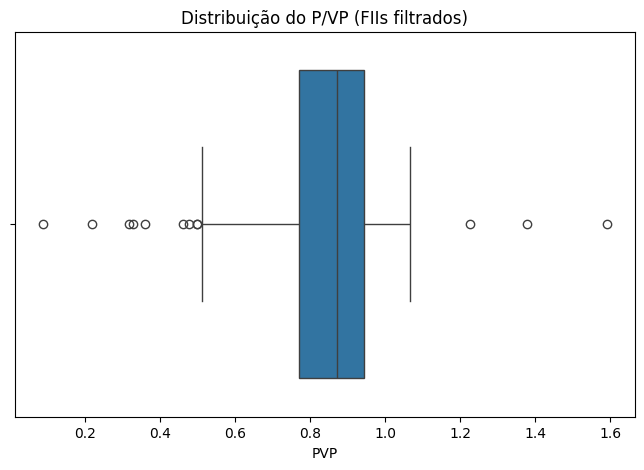

In [ ]:
# Boxplot para a liquidez
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtrado['PVP'])
plt.title("Distribuição do P/VP (FIIs filtrados)")
plt.show()

#### Filtragem dos 30 FIIs com maior YIELD (yield de 12 meses)

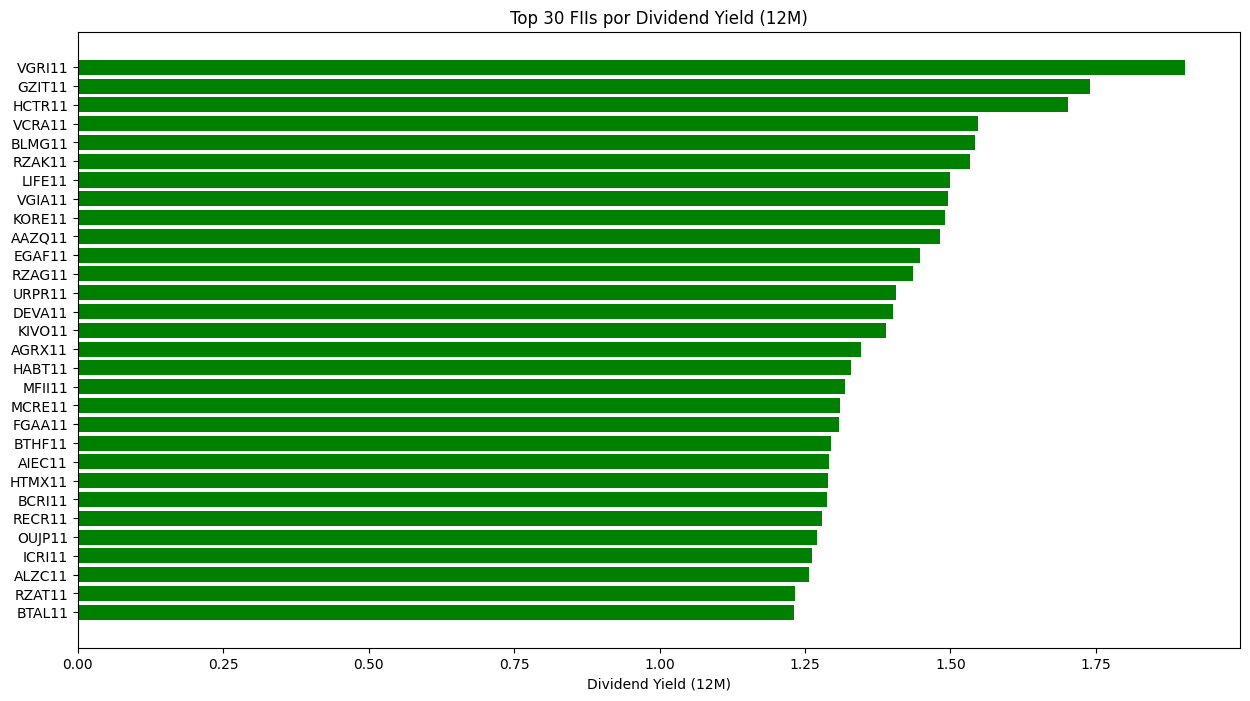

In [234]:
df_top30_yield = df_filtrado.nlargest(30, 'MEDIA_YIELD_12M')

plt.figure(figsize=(15, 8))
plt.barh(df_top30_yield.index, df_top30_yield['MEDIA_YIELD_12M'], color='green')
plt.xlabel("Dividend Yield (12M)")
plt.title("Top 30 FIIs por Dividend Yield (12M)")
plt.gca().invert_yaxis()
plt.show()

#### Dispersão P/VP vs Rentabilidade

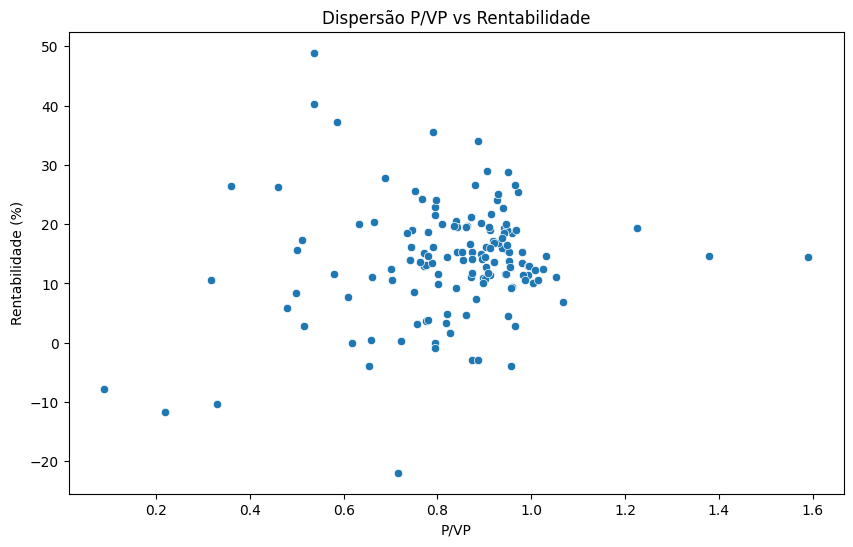

In [224]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtrado['PVP'], y=df_filtrado['RENTABILIDADE'])
plt.title("Dispersão P/VP vs Rentabilidade")
plt.xlabel("P/VP")
plt.ylabel("Rentabilidade (%)")
plt.show()

#### Gráfico de barras - Ranking de FIIs pela rentabilidade

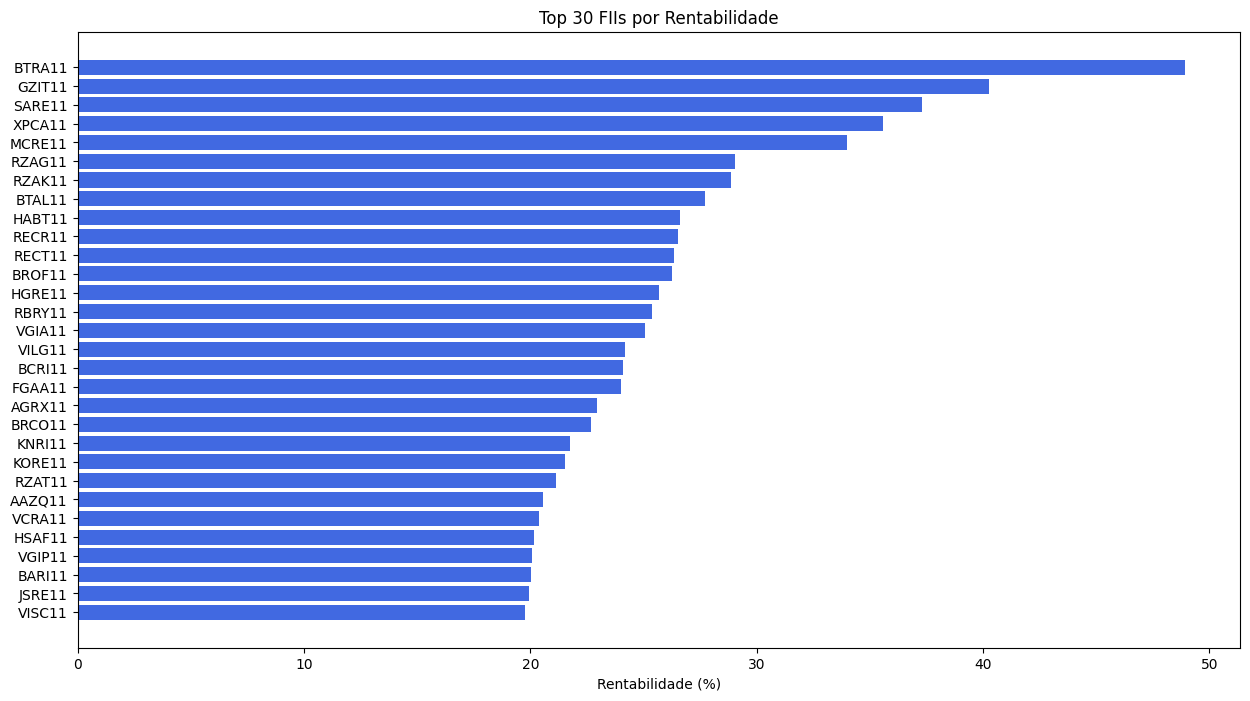

In [233]:
df_top30_rent = df_filtrado.nlargest(30, 'RENTABILIDADE')

plt.figure(figsize=(15, 8))
plt.barh(df_top30_rent.index, df_top30_rent['RENTABILIDADE'], color='royalblue')
plt.xlabel("Rentabilidade (%)")
plt.title("Top 30 FIIs por Rentabilidade")
plt.gca().invert_yaxis()
plt.show()

#### Gráfico de bolhas(3D)

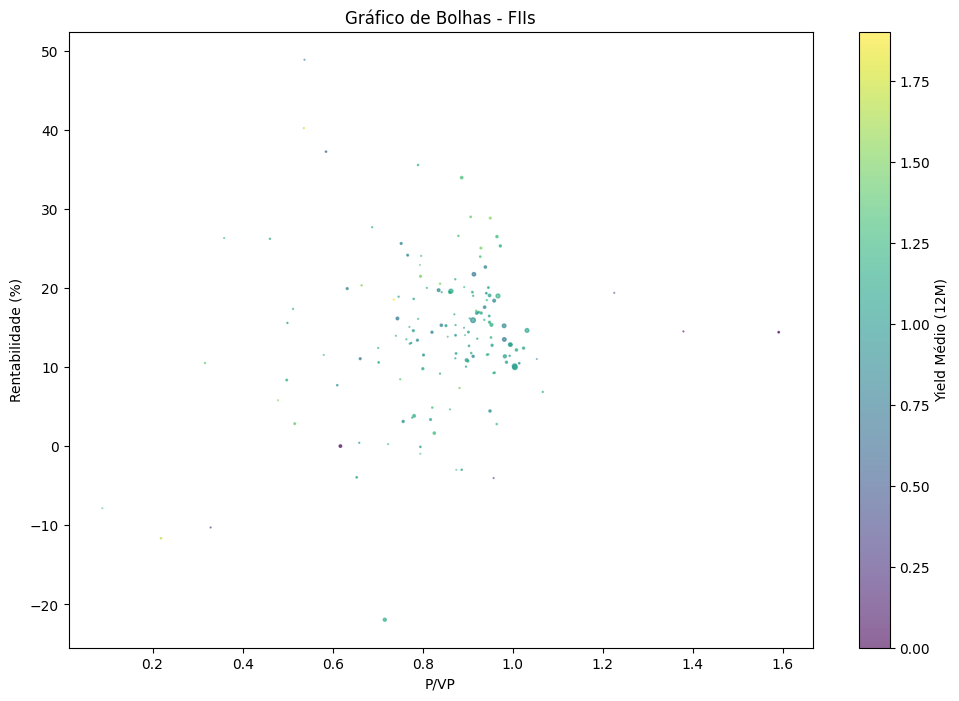

In [239]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_filtrado['PVP'],
    df_filtrado['RENTABILIDADE'],
    s=df_filtrado['LIQUIDEZ_MEDIA_DIARIA'] / 1e6,
    c=df_filtrado['MEDIA_YIELD_12M'],  # cor pelo yield
    cmap='viridis',
    alpha=0.6
)

plt.colorbar(scatter, label="Yield Médio (12M)")
plt.xlabel("P/VP")
plt.ylabel("Rentabilidade (%)")
plt.title("Gráfico de Bolhas - FIIs")
plt.show()
